<a href="https://colab.research.google.com/github/myschl/ML-DL/blob/master/MNIST_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import normalize
from keras import regularizers
import pandas as pd
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# mnist_train = pd.read_csv('/content/sample_data/mnist_train_small.csv')
# mnist_test = pd.read_csv('/content/sample_data/mnist_test.csv')

(X_train, y_train),(X_valid, y_valid) = mnist.load_data()

X_train_r = X_train.copy()
y_train_r = y_train.copy()

# Tensors Normalization
X_train_r = normalize(X_train_r)
y_train_r = normalize(y_train_r)

X_valid = normalize(X_valid)
y_valid = normalize(y_valid)

# X_train_r = np.asarray(X_train_r)
# y_train_r = np.asarray(y_train_r)

# X_valid = np.asarray(X_valid).astype('float32')
# y_valid = np.asarray(y_valid).astype('float32')

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
X_valid[50]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  35, 156, 246,  58,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  28, 217, 253, 250,  54,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 127, 253, 253, 153,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [0]:
# X_train_r = X_train_r.reshape((60000, 28 * 28))
# X_train_r = X_train_r.astype('float32')/255

# y_train_r = y_train_r.reshape((10000, 28 * 28))
# y_train_r = y_train_r.astype('float32')/255


# scaler = StandardScaler().fit(X_train_r)
# X_train_s = scaler.fit_transform(X_train_r)

# scaler2 = StandardScaler().fit(y_train_r)
# y_train_s = scaler2.fit_transform(y_train_r)


In [0]:
X_train_r.shape

(60000, 28, 28)

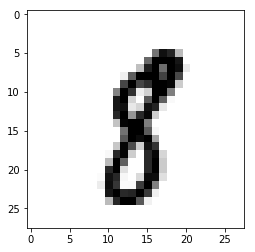

In [0]:
plt.imshow(X_train[300], cmap = plt.cm.binary)
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(10, activation = 'relu', input_shape = (28 * 28, )))
# model.add(layers.Dense(8, activation = 'relu'))
# model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax')) 

model.compile(optimizer = 'rmsprop' ,
             loss = 'categorical_crossentropy',
             matrics = ['accuracy'])

history = model.fit(X_train_r, y_train_r.T, 
                   epochs = 10, 
                   batch_size = 100,
                   validation_data=(X_valid, y_valid.T))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1474 - val_loss: 0.4197
Epoch 2/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1687 - val_loss: 0.4045
Epoch 3/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1602 - val_loss: 0.3821
Epoch 4/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1530 - val_loss: 0.3710
Epoch 5/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1475 - val_loss: 0.3635
Epoch 6/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1428 - val_loss: 0.3548
Epoch 7/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1370 - val_loss: 0.3317
Epoch 8/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.

In [0]:
history_keys = history.history
history_keys.keys()

dict_keys(['loss', 'val_loss'])

In [19]:
model2 = models.Sequential()
model2.add(layers.Flatten())
model2.add(layers.Dense(10, kernel_regularizer = regularizers.l1(0.01) , activation = 'relu', input_shape = (28 * 28, )))
# model2.add(layers.Dense(8, activation = 'relu'))
# model2.add(layers.Dense(16, activation = 'relu'))
model2.add(layers.Dense(10, activation = 'softmax')) 

model2.compile(optimizer = 'rmsprop' ,
             loss = 'categorical_crossentropy',
             matrics = ['accuracy'])

history2 = model.fit(X_train_r, y_train_r.T, 
                   epochs = 10, 
                   batch_size = 100,
                   validation_data=(X_valid, y_valid.T))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0897 - val_loss: 0.2222
Epoch 2/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0911 - val_loss: 0.2234
Epoch 3/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0927 - val_loss: 0.2267
Epoch 4/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0942 - val_loss: 0.2266
Epoch 5/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0953 - val_loss: 0.2359
Epoch 6/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0968 - val_loss: 0.2331
Epoch 7/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0987 - val_loss: 0.2220
Epoch 8/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0993 - val_loss: 0.2086
Epoch 9/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1006 - val_

In [21]:
model3 = models.Sequential()
model3.add(layers.Flatten())
model3.add(layers.Dense(10, kernel_regularizer = regularizers.l1(0.01) , activation = 'relu', input_shape = (28 * 28, )))
model3.add(layers.Dropout(0.5))
# model3.add(layers.Dense(16, activation = 'relu'))
model3.add(layers.Dense(10, activation = 'softmax')) 

model3.compile(optimizer = 'rmsprop' ,
             loss = 'categorical_crossentropy',
             matrics = ['accuracy'])

history3 = model.fit(X_train_r, y_train_r.T, 
                   epochs = 10, 
                   batch_size = 100,
                   validation_data=(X_valid, y_valid.T))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1048 - val_loss: 0.2863
Epoch 2/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1068 - val_loss: 0.2812
Epoch 3/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1100 - val_loss: 0.2404
Epoch 4/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1120 - val_loss: 0.2498
Epoch 5/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1153 - val_loss: 0.2790
Epoch 6/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1185 - val_loss: 0.3528
Epoch 7/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1219 - val_loss: 0.2859
Epoch 8/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1245 - val_loss: 0.3073
Epoch 9/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1278 - val_

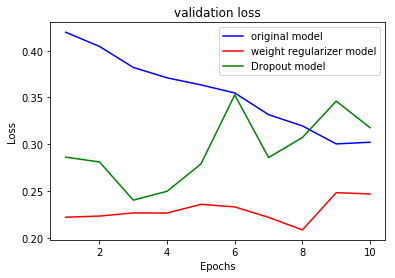

In [28]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

history_dict2 = history2.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']

history_dict3 = history3.history
loss_values3 = history_dict3['loss']
val_loss_values3 = history_dict3['val_loss']

epochs = range(1, 10 + 1)
plt.plot(epochs, val_loss_values, 'b-', label='original model')
plt.plot(epochs, val_loss_values2, 'r-', label='weight regularizer model')
plt.plot(epochs, val_loss_values3, 'g-', label='Dropout model')
plt.title('validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
scores.history

{'loss': [0.10740356841087341, 0.11607370029687882]}

In [0]:
y_valid = y_valid.T
y_valid.shape

(10000, 1)

In [0]:
loss = model.evaluate(X_valid, y_valid)

print( loss)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.2018
0.20179340181350708
